In [1]:
#@title Importations

import numpy as np
import matplotlib.pyplot as plt
import random
import csv

In [3]:
#@title Fonctions

def lire_fichier(nom):
  """
    lit un fichier .csv et retourne la première ligne comme en_tête
    et les données dans un tableau
  """
  ## une liste de listes
  tableau = []

  en_tete = []
  with open(nom) as fichier:
    lecteur = csv.reader(fichier)
    en_tete = next(lecteur)
    for ligne_lue in lecteur:
      tableau.append(ligne_lue)
  return en_tete, tableau

def calculer_moyenne_annuelle(annee, en_tete, tableau):
  """
    retourne la moyenne de la colonne correspondant au paramètre annee
  """
  somme = 0.0
  position = en_tete.index(annee)
  for i in range(len(tableau)):
    somme += float(tableau[i][position])
  return somme / len(tableau)


Pour l'année 1993, la moyenne est 10.88
Pour l'année 2003, la moyenne est 11.21
Pour l'année 2013, la moyenne est 11.61
Pour l'année 2023, la moyenne est 11.87
L'année 2023 est la plus chaude
L'année 1993 est la plus froide


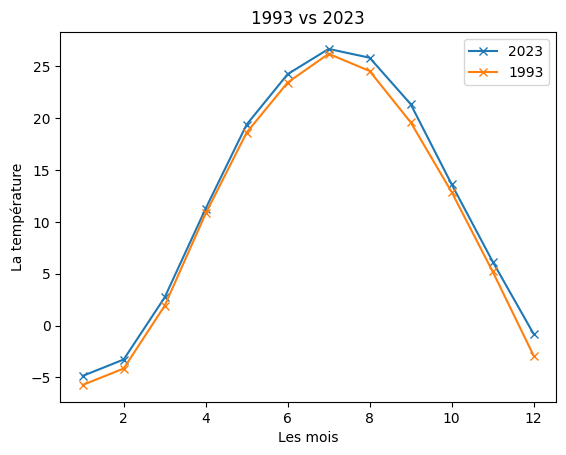

In [5]:
#@title Programme

en_tete, tableau = lire_fichier("montreal_temperature_max_mensuel.csv")

# calculer la moyenne pour chacune des années
moyennes = []

for annee in en_tete:
  moyenne = calculer_moyenne_annuelle(annee, en_tete, tableau)
  moyennes.append(moyenne)
  print(f"Pour l'année {annee}, la moyenne est {moyenne:.2f}")

indice_plus_chaude = moyennes.index(max(moyennes))
annee_la_plus_chaude = en_tete[indice_plus_chaude]
indice_plus_froide = moyennes.index(min(moyennes))
annee_la_plus_froide = en_tete[indice_plus_froide]

print(f"L'année {annee_la_plus_chaude} est la plus chaude")
print(f"L'année {annee_la_plus_froide} est la plus froide")


# On fait le graphique
liste_min = []
liste_max = []
for i in range(len(tableau)):
  liste_min.append(float(tableau[i][indice_plus_froide]))
  liste_max.append(float(tableau[i][indice_plus_chaude]))

plt.plot(range(1, 12+1), liste_max, "-x", label=annee_la_plus_chaude)
plt.plot(range(1, 12+1), liste_min, "-x", label=annee_la_plus_froide)
plt.xlabel("Les mois")
plt.ylabel("La température")
plt.title(annee_la_plus_froide + " vs " + annee_la_plus_chaude)
plt.legend()
plt.show()
